In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib

# CLASSIFICATION

In general, all classification algorithms in Scikit-Learn are handled in the same way. There are three basic steps:

- We instantiate the algorithm by fixing its parameters by calling the algorithm's main function.

- We train the algorithm by using its *fit* method.

- We make predictions by using the available prediction methods (*predict* and/or *predict_proba*, the latter not always available).

As an example, we consider *logistic regression* algorithm. The main function is in the module *sklearn.linear_model* and it is called *LogisticRegression*.

The documentation of the function is here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


We show the usage taking into account the four features of the Pima Indians Diabetes dataset. We would have a binary classification problem, with 8 input features and 768 samples.

(i) Data loading and train/test split

In [3]:
from sklearn.model_selection import train_test_split

diabetes = pd.read_csv('pima-indians-diabetes.csv')
x = diabetes.values[:, :-1]
y = diabetes.values[:, -1]

xtr, xte, ytr, yte = train_test_split(x, y, test_size=30, random_state=0, shuffle=True, stratify=y) 

(ii) Parameter selection

In [4]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg

LogisticRegression()

(iii) Model training

In [5]:
logreg.fit(xtr, ytr)

C:\Users\ccernuda\Anaconda3\envs\base_ml\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

(iv) Predictions of the test samples

In [6]:
y_hat_classes = logreg.predict(xte)
y_hat_proba = logreg.predict_proba(xte)

(v) Score calculation

In [7]:
from sklearn.metrics import roc_auc_score
mean_accuracy = logreg.score(xte, yte)
auc = roc_auc_score(yte, y_hat_classes)
print('The mean accuracy obtained is: ' + str(mean_accuracy))
print('The area under the ROC curve obtained is: ' + str(auc))

The mean accuracy obtained is: 0.8666666666666667
The area under the ROC curve obtained is: 0.825


(vi) Summary validation information

Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

         0.0     0.8636    0.9500    0.9048        20
         1.0     0.8750    0.7000    0.7778        10

    accuracy                         0.8667        30
   macro avg     0.8693    0.8250    0.8413        30
weighted avg     0.8674    0.8667    0.8624        30


Confusion matrix:
[[19  1]
 [ 3  7]]


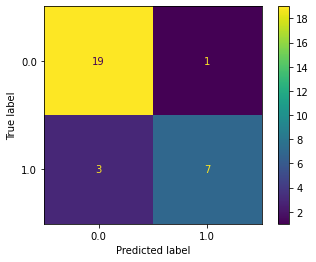

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
expected = yte
predicted = y_hat_classes
print("Classification report for classifier %s:\n%s\n"
      % (logreg, classification_report(expected, predicted, digits=4)))
print("Confusion matrix:\n%s" % confusion_matrix(expected, predicted))
plot_confusion_matrix(logreg, xte, yte)

## Logistic regression

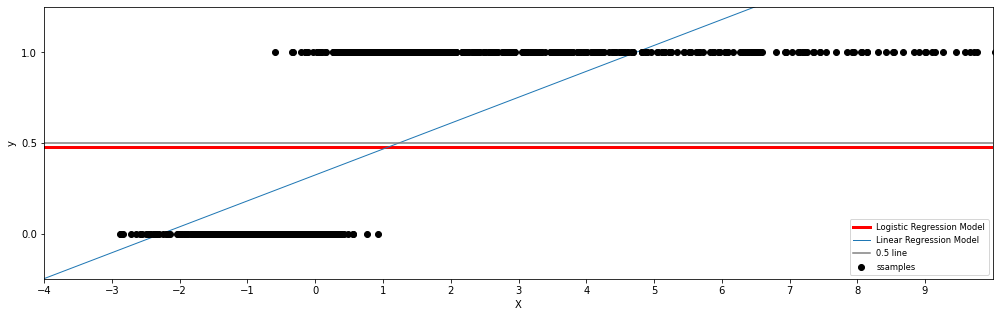

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 1000
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
# run the classifier
clf = linear_model.LogisticRegression(C=1e-10)
clf.fit(X, y)

# and plot the result
plt.figure(figsize=(17, 5))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model','0.5 line','ssamples'), loc="lower right", fontsize='small')
plt.show()

## Naive Bayes (NB)

### Gaussian NB

Parameters: *priors* and *var_smoothing*. 

Exercise:Describe them and point out the default values.

See documentation: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

Number of mislabeled points out of a total 150 points : 6


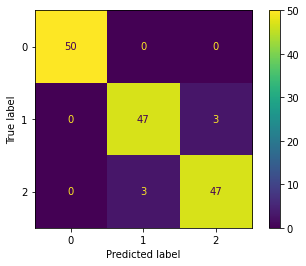

In [11]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"
      % (iris.data.shape[0],(iris.target != y_pred).sum()))
plot_confusion_matrix(gnb, iris.data, iris.target)

### Multinomial NB
Parameters: *alpha*, *fit_prior* and *class_prior*

Exercise: Describe them and point out the default values.

See documentation: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

In [ ]:
# Replicar el ejemplo anterior


### Bernoulli NB
Parameters: *alpha*, *binarize*, *fit_prior* and *class_prior*

Exercise: Describe them and point out the default values.

See documentation: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB

In [ ]:
# Replicar el ejemplo anterior


## Support vector Machines

### Iris dataset

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm


iris = datasets.load_iris()
X = iris.data
y = iris.target

# Use only 2 classes and 2 variables
X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for fig_num, kernel in enumerate(['linear','rbf','poly']):
    clf = svm.SVC(kernel=kernel, gamma=10, degree=3)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

#### Problem 1:
- Play with the rbf kernel parameters and check how the shapes of the classification change when using the same classes as the example and the second and forth variables.
- Do the same for another pair of classes.
- Comment the differences you see in both cases.

In [ ]:
# Part1


In [ ]:
# Part2


#### Comments:
Here

### Digits dataset

In [ ]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, data[n_samples // 2:], digits.target[n_samples // 2:])


images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

#### Problem 2:
- Try all One-vs-Rest strategies, and calculate an estimation of the F1 score. Use f1_macro.
- Try all One-vs-One strategies, and calculate an estimation of the AUC score. Use roc_auc_score.

In [ ]:
# Part 1


In [ ]:
# Part 2

## Classification threshold adjust

In [ ]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

In [ ]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10,1]

In [ ]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [ ]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

Lowering down the threshold we raise sensitivity.

In [ ]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [ ]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

In [ ]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10].astype(int)

In [ ]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

In [ ]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

### Problem 1 (solution)

In [ ]:
#Your solution here (include commented answer to the third point)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Use only 2 classes and 2 variables
X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for fig_num, gamma in enumerate(['auto','scale', 0.01, 0.1, 1, 10, 100]):
    clf = svm.SVC(kernel='rbf', gamma=gamma)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title('gamma = ' + str(gamma))
plt.show()

In [ ]:
#Your solution here (include commented answer to the third point)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Use only 2 classes and 2 variables
X = X[y != 1, :2]
y = y[y != 1]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for fig_num, gamma in enumerate(['auto','scale', 0.01, 0.1, 1, 10, 100]):
    clf = svm.SVC(kernel='rbf', gamma=gamma)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title('gamma = ' + str(gamma))
plt.show()

#### Comments:
In the second case, the accuracy is much higher (almost perfect). Moreover, also in the second case, the shapes with higher gamma (i.e. more flexibility to fit better to training data) are not so dispersed (only two almost convex blue bubbles).

The reason for it is that this second problem is much easier than the first. We should be able to realize it, because in the second problem one of the classes we have to classify is Setosa, but in the first we classify Virginica and Versicolor. 

### Problem 2 (solution)

In [ ]:
# Your solution here
from sklearn.metrics import f1_score


digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
n_classes = len(np.unique(digits.target))

classifier = svm.SVC(gamma=0.001)

xtr, xte, ytr, yte = train_test_split(data, digits.target, test_size=0.5, random_state=0, shuffle=True, stratify=digits.target)

f1 = 0

for x in list(range(10)):
    ytr_aux = ytr.copy()
    for y in list(range(len(ytr_aux))):
        if ytr_aux[y] != x:
            ytr_aux[y] = -1
        else:
            ytr_aux[y] = 1
    classifier.fit(xtr, ytr_aux)
    expected = yte.copy()
    for y in list(range(len(expected))):
        if expected[y] != x:
            expected[y] = -1
        else:
            expected[y] = 1
    predicted = classifier.predict(xte)
    f1_partial = f1_score(expected, predicted, average='macro')
    print(f1_partial)
    # cummulative average
    f1 = ((x*f1) + f1_partial)/(x+1)
f1

In [ ]:
# Your solution here
from sklearn.metrics import roc_auc_score


digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
n_classes = len(np.unique(digits.target))

classifier = svm.SVC(gamma=0.001)

xtr, xte, ytr, yte = train_test_split(data, digits.target, test_size=0.5, random_state=0, shuffle=True, stratify=digits.target)

auc = 0
steps_counter = 0
auc_vect = np.zeros(int((n_classes*(n_classes-1))/2))

for x1 in list(range(9)):
    for x2 in list(range(x1 + 1, 10)):
        indices_tr = [False] * len(ytr)
        indices_te = [False] * len(yte)
        for y in list(range(len(ytr))):
            if ytr[y] in [x1, x2]:
                indices_tr[y] = True  
        for z in list(range(len(yte))):
            if yte[z] in [x1, x2]:
                indices_te[z] = True  
        xtr_sub = xtr.copy()[indices_tr, :]
        ytr_sub = ytr.copy()[indices_tr]
        classifier.fit(xtr_sub, ytr_sub)
        xte_sub = xte.copy()[indices_te, :]
        yte_sub = yte.copy()[indices_te]
        expected = yte_sub.copy()
        predicted = classifier.predict(xte_sub)
        auc_partial = roc_auc_score(expected, predicted)
        
        # cummulative average vs vector&average
        auc = ((steps_counter*auc) + auc_partial)/(steps_counter+1)
        auc_vect[steps_counter - 1] = auc_partial
        
        steps_counter += 1
print(auc)
print(np.mean(auc_vect))

Note: The value is not exactly the same because the cummulative option if affected by a repetitive (45 times) rounding effect. On the contrary, the rounding effect with the vector option happens only once.